#Kaggle Website Link : https://www.kaggle.com/competitions/anadolu-hayat-emeklilik-datathon-coderspace/overview


Ranked 13th among 114 teams

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

#Modelling
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from catboost import CatBoostClassifier


In [2]:
os.chdir('C:\\Users\\baris\\AHE-Datathon')

In [3]:
train_df = pd.read_csv('train-utf8.csv')
test_df = pd.read_csv('test-utf8 (1).csv')
sub_df = pd.read_csv('samplesubmission.csv')

In [4]:
train_df.head()

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,...,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,...,220.0,220,220.0,220,220.0,220,220.0,15248.75,25684.25,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,...,160.0,160,160.0,160,160.0,160,160.0,5842.71,10104.56,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,...,256.0,256,256.0,256,256.0,256,256.0,3782.86,7060.94,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,...,150.0,150,150.0,150,150.0,150,150.0,6855.03,12645.25,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,...,100.0,100,100.0,100,100.0,100,100.0,27837.75,31613.07,0


In [5]:
test_df.head()

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,...,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI
0,6005558,10056,1,NEW,NEW,2016-06,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,SAMSUN,...,220,220.0,220,220.0,220,220.0,220,220.0,8903.84,14261.24
1,1227288,10006,1,NEW,NEW,2017-09,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,OSMANİYE,...,260,260.0,260,260.0,260,260.0,260,260.0,5373.67,8716.74
2,5694750,10006,1,NEW,NEW,2018-12,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,...,210,210.0,210,210.0,210,210.0,210,210.0,2782.68,6601.50
3,3150098,10006,1,NEW,NEW,2019-07,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANKARA,...,210,210.0,210,210.0,210,210.0,210,210.0,1267.82,4428.12
4,4622228,10090,1,NEW,NEW,2015-06,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,DENİZLİ,...,0,180.0,0,180.0,0,180.0,0,180.0,702.60,799.47


In [6]:
train_df.shape

(634112, 49)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
POLICY_ID,634112.0,5.494078e+06,2.591409e+06,1000050.00,3247899.250,5497920.000,7.739650e+06,9989995.00
OFFICE_ID,634112.0,1.033139e+04,3.945865e+02,10000.00,10006.000,10152.000,1.055600e+04,11756.00
SIGORTA_TIP,634112.0,2.536787e+00,2.600031e+00,1.00,1.000,1.000,6.000000e+00,8.00
DOGUM_TARIHI,634112.0,1.977636e+03,1.108985e+01,1921.00,1970.000,1978.000,1.986000e+03,2004.00
CINSIYET,634112.0,1.512749e+00,4.998378e-01,1.00,1.000,2.000,2.000000e+00,2.00
MEMLEKET,634112.0,1.007111e+00,1.064311e-01,1.00,1.000,1.000,1.000000e+00,3.00
MUSTERI_SEGMENTI,634109.0,1.043820e+02,1.521238e+00,101.00,103.000,105.000,1.060000e+02,106.00
COCUK_SAYISI,516004.0,1.039779e-01,4.761188e-01,0.00,0.000,0.000,0.000000e+00,20.00
OCAK_ODENEN_TUTAR,634112.0,2.044571e+02,3.412389e+02,0.00,0.000,160.000,2.700000e+02,20000.00
OCAK_VADE_TUTARI,634112.0,3.148807e+02,5.240904e+02,17.00,170.000,228.000,3.400000e+02,300000.00


In [9]:
train_df["GELIR"]= train_df["GELIR"].replace(',','', regex=True).astype(float)
test_df["GELIR"]=test_df["GELIR"].replace(',','', regex=True).astype(float)

In [10]:
label = "ARTIS_DURUMU"
cat_cols = ["OFFICE_ID",
            "SIGORTA_TIP",
            "MEMLEKET",
            "MUSTERI_SEGMENTI",
           "CINSIYET",
            "UYRUK",
            "MESLEK",
            "MESLEK_KIRILIM",
            "YATIRIM_KARAKTERI",
            "MEDENI_HAL",
            "EGITIM_DURUM",
           "SOZLESME_KOKENI",
            "SOZLESME_KOKENI_DETAY",
            "KAPSAM_TIPI",
            "KAPSAM_GRUBU",
            "DAGITIM_KANALI",
            "POLICE_SEHIR",
            "BASLANGIC_TARIHI"
           ]

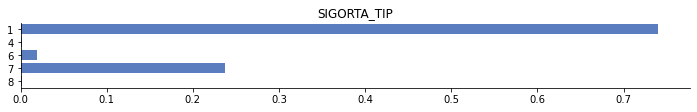

--------------------


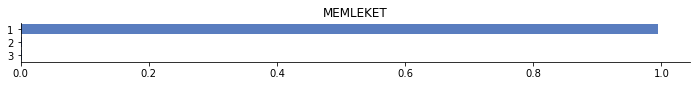

--------------------


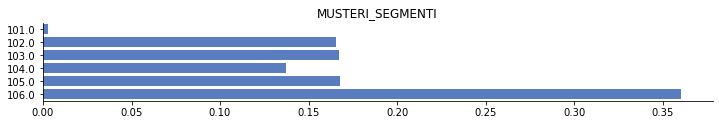

--------------------


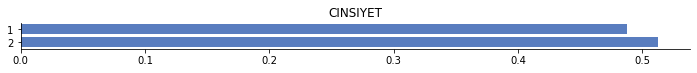

--------------------


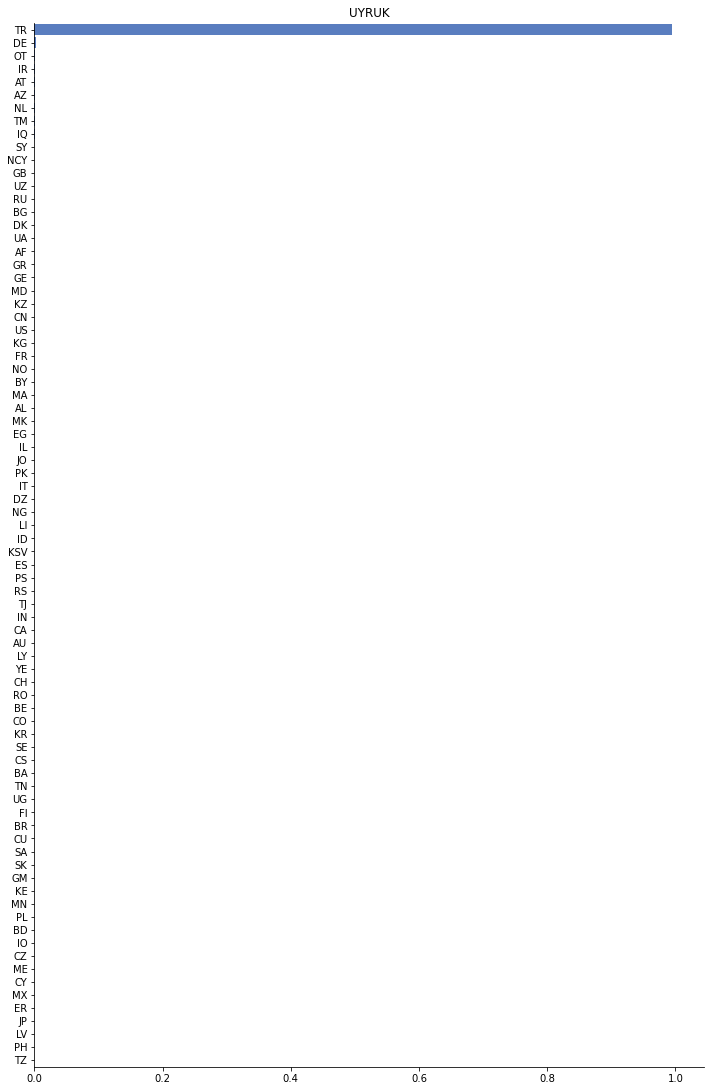

--------------------


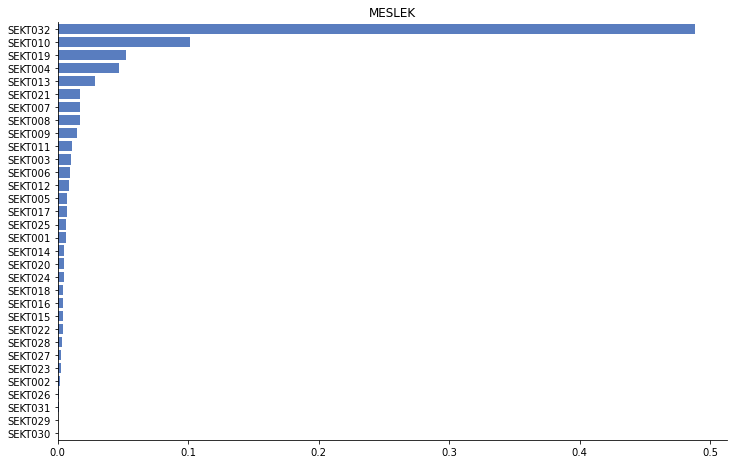

--------------------


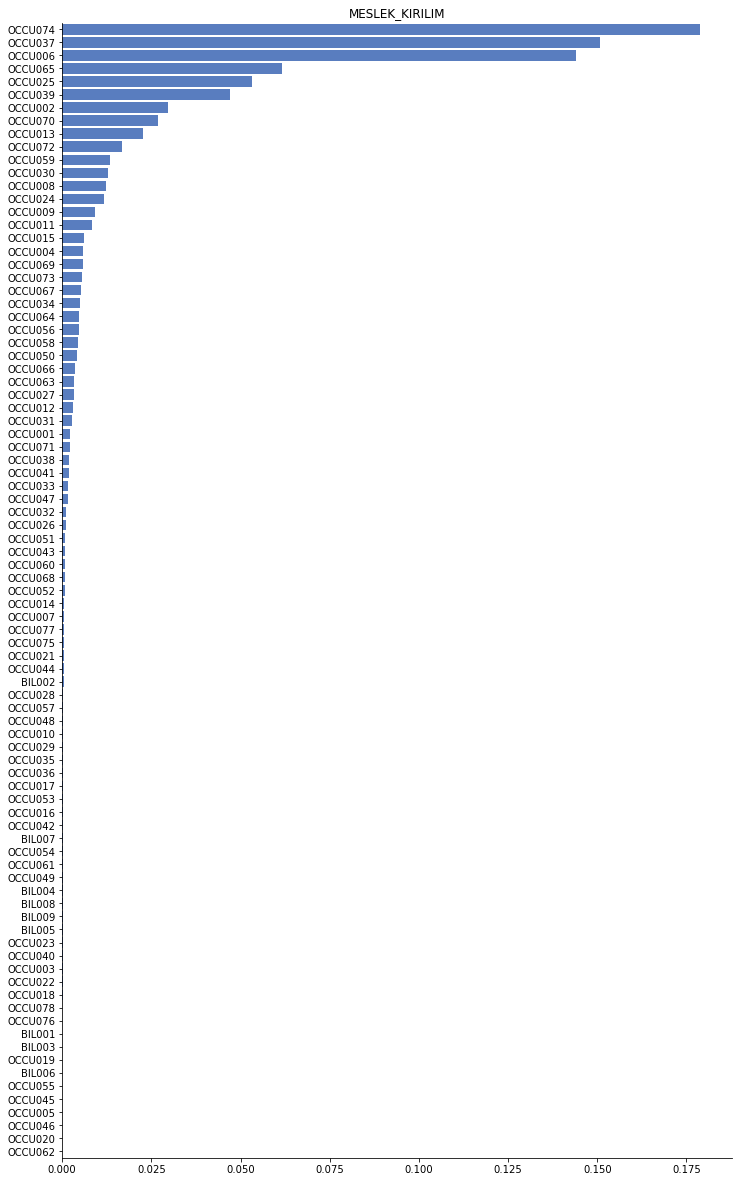

--------------------


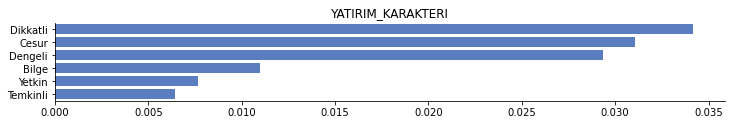

--------------------


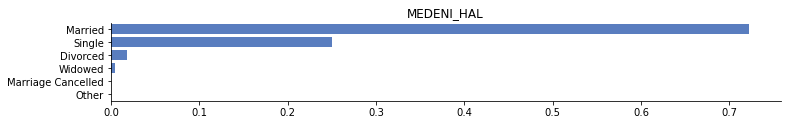

--------------------


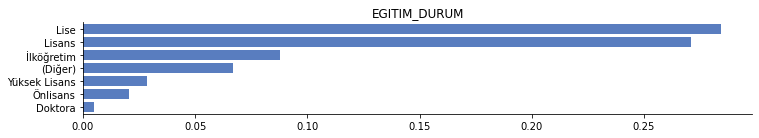

--------------------


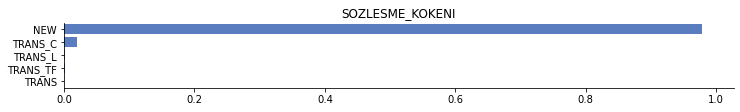

--------------------


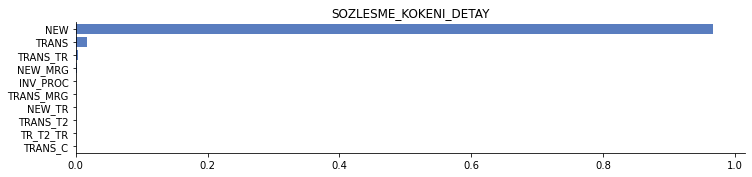

--------------------


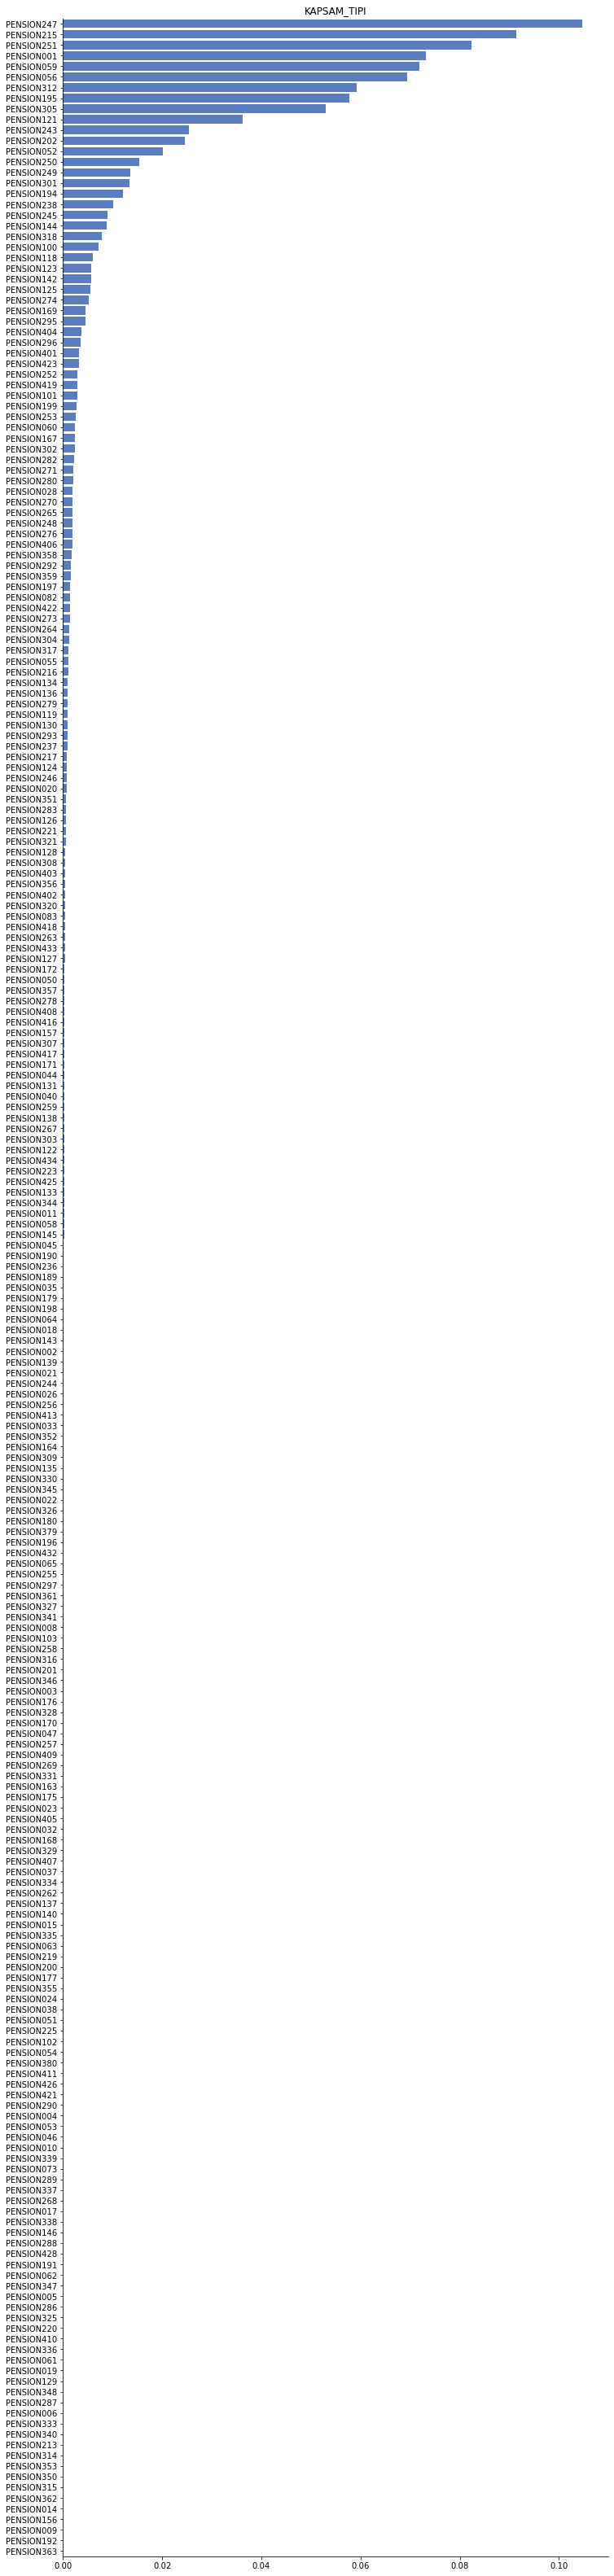

--------------------


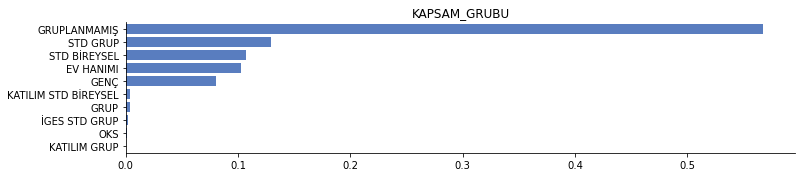

--------------------


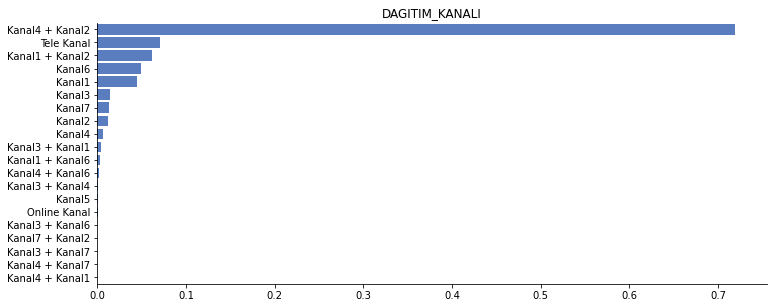

--------------------


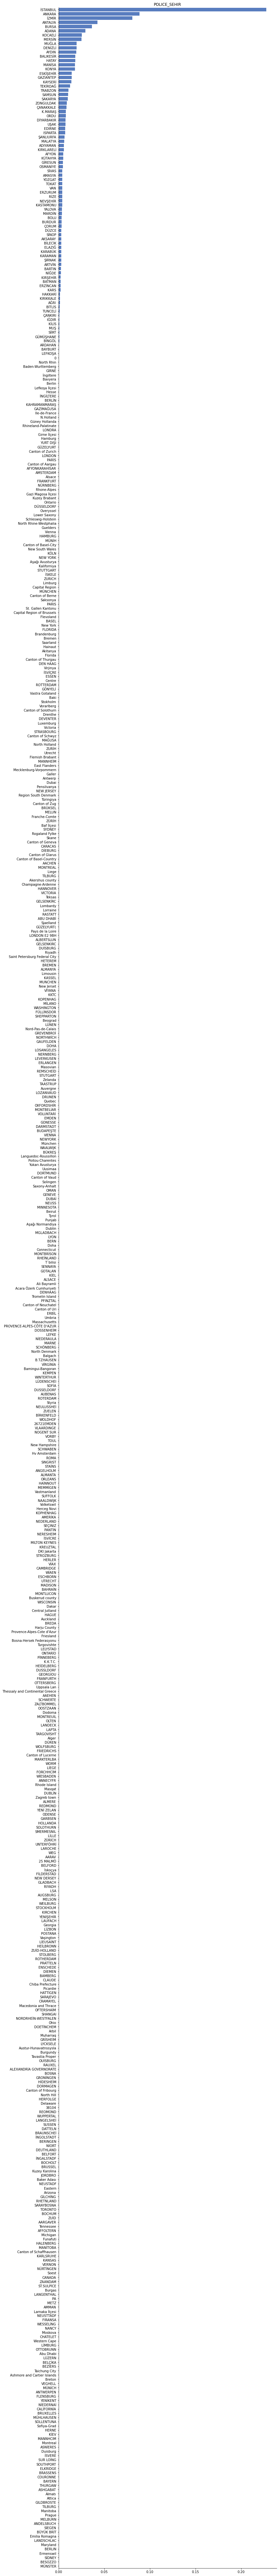

--------------------


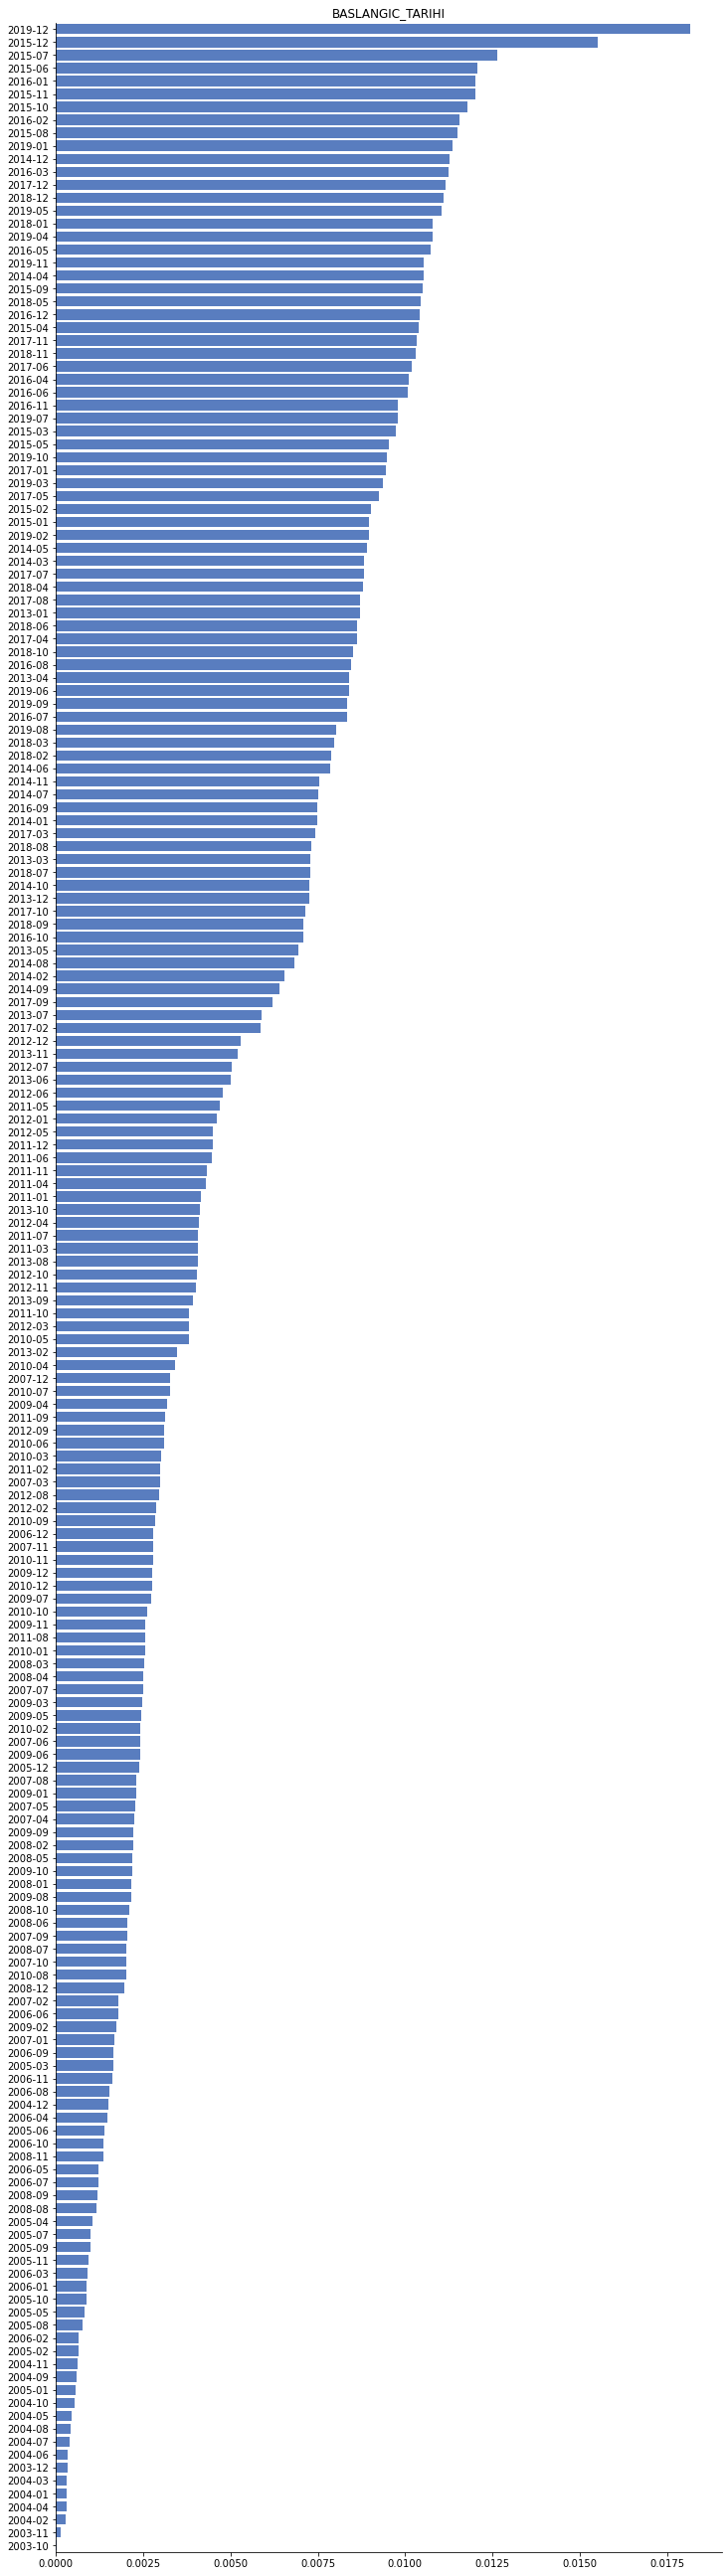

--------------------


In [11]:
for cat_col in cat_cols[1:]:
    unq_count = train_df[cat_col].nunique()
    fig, ax = plt.subplots(1, figsize=(12,unq_count*0.24))
    
    unq_count_df = (train_df[cat_col].value_counts() / len(train_df)).sort_values(ascending=False).reset_index()

    sns.set_color_codes("muted")
    sns.barplot(x=cat_col, y="index", data=unq_count_df, color="b", orient = 'h')
    sns.despine(left=False, bottom=False)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.title(cat_col)
    plt.show()
    print("-"*20)

In [12]:
sparse_categories = ["UYRUK", "MESLEK", "MESLEK_KIRILIM", "KAPSAM_TIPI", "DAGITIM_KANALI", "POLICE_SEHIR"]

for sparse_category in sparse_categories:
    to_replace = list(train_df[sparse_category].value_counts()[((train_df[sparse_category].value_counts()/len(train_df)) < 0.0003)].index)
    train_df[sparse_category].replace(to_replace=to_replace, value="-1", inplace=True)
    test_df[sparse_category].replace(to_replace=to_replace, value="-1", inplace=True)

In [13]:
train_df.set_index('POLICY_ID',inplace=True)
test_df.set_index('POLICY_ID',inplace=True)

## Modelling with CatBoost

In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

#cross validation

skf = StratifiedKFold(n_splits=5)

In [15]:
X=train_df.drop(label,axis=1)
y=train_df[label]

In [16]:
for caterogical_col in cat_cols:
    X[caterogical_col] = X[caterogical_col].astype(str).astype("category")
    test_df[caterogical_col] = test_df[caterogical_col].astype(str).astype("category")

In [17]:
import gc
gc.collect()
score_list = []
fold = 1
unseen_preds = []
importance = []
val_results=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_val = X.iloc[train_index],X.iloc[test_index]
    y_train,y_val = y.iloc[train_index],y.iloc[test_index]
    
    print(X_train.shape,X_val.shape)
    params={'auto_class_weights':'SqrtBalanced'}
    cat = CatBoostClassifier(**params, 
                            iterations = 5000,eval_metric="F1:use_weights=False",learning_rate=0.05,
                            allow_writing_files=False
                            ,cat_features=cat_cols,
                             task_type="CPU",
                             devices='0:1',
                           )
    cat.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds=400,verbose=250)
    
    sub_preds=cat.predict_proba(test_df)[:,1]
    unseen_preds.append(sub_preds)
    val_results.append(cat.predict_proba(X_val)[:,1])
    score = f1_score(y_val, cat.predict(X_val), average=None)
    score_t = f1_score(y_train, cat.predict(X_train), average=None)
    print(f"F1 FOLD-{fold}:{score}")
    print(f"F1 Train FOLD-{fold}:{score_t}")
    score_list.append(score)
    importance.append(cat.get_feature_importance())
    fold+=1
print("CV Mean Score:",np.mean(np.array(score_list)[:,1:]))

(507289, 47) (126823, 47)
0:	learn: 0.3229513	test: 0.3501958	best: 0.3501958 (0)	total: 624ms	remaining: 51m 57s
250:	learn: 0.4093083	test: 0.4132710	best: 0.4132710 (250)	total: 1m 50s	remaining: 34m 48s
500:	learn: 0.4316300	test: 0.4258162	best: 0.4266616 (497)	total: 3m 41s	remaining: 33m 11s
750:	learn: 0.4431978	test: 0.4353158	best: 0.4353402 (739)	total: 5m 32s	remaining: 31m 21s
1000:	learn: 0.4536844	test: 0.4395233	best: 0.4395233 (1000)	total: 7m 18s	remaining: 29m 12s
1250:	learn: 0.4621323	test: 0.4416110	best: 0.4416745 (1249)	total: 9m 10s	remaining: 27m 30s
1500:	learn: 0.4692114	test: 0.4424696	best: 0.4427301 (1435)	total: 11m 4s	remaining: 25m 49s
1750:	learn: 0.4759318	test: 0.4424403	best: 0.4427301 (1435)	total: 12m 55s	remaining: 23m 58s
2000:	learn: 0.4823026	test: 0.4442345	best: 0.4444759 (1984)	total: 14m 44s	remaining: 22m 6s
2250:	learn: 0.4880147	test: 0.4429105	best: 0.4446857 (2031)	total: 16m 34s	remaining: 20m 14s
Stopped by overfitting detector  (4

In [18]:
submission=pd.DataFrame(np.mean(unseen_preds,axis=0)).set_index(test_df.index).rename(columns={0:'ARTIS_DURUMU'})
submission['ARTIS_DURUMU'] = submission['ARTIS_DURUMU'].apply(lambda x: 1 if x>=0.5 else 0)
submission=submission.reset_index().rename(columns={'policy_id':'POLICY_ID'})
submission.to_csv('submission.csv',index=False)

In [19]:
submission

,POLICY_ID,ARTIS_DURUMU
0,6005558,0
1,1227288,0
2,5694750,0
3,3150098,0
4,4622228,0
...,...,...
243132,3770316,0
243133,5494903,0
243134,3067076,0
243135,9627159,0


In [20]:
submission.to_csv (r'C:\Users\baris\AHE-Datathon\export_dataframe.csv')